In [4]:
import pandas as pd
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

x = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [8]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np

reg = AdaBoostRegressor(base_estimator=None)
reg.fit(x_train,y_train)
pred =reg.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test,y_test)

print('MSE \t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE 	5373303.97
MAE	1739.332
RMSE	2318.039
ACC	91.099%


In [9]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)

feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.014195
1          carheight     0.006477
2          carlength     0.011035
3           carwidth     0.048396
4            citympg     0.011129
5   compressionratio     0.008209
6         curbweight     0.050761
7         enginesize     0.674354
8         highwaympg     0.050937
9         horsepower     0.087828
10           peakrpm     0.005748
11            stroke     0.007143
12         wheelbase     0.023788


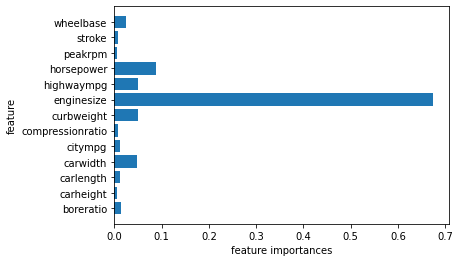

In [11]:
import matplotlib.pyplot as plt

n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align = 'center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1,n_features)
plt.show()